# Bitcoin Sentiment Analysis

Order of notebook:
1. Importing of the releavant libraries
2. Load the data set
3. Topic modelling analysis
4. Preparing to build the model
5. Building the model
6. Evaluation

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import string 

In [2]:
# import the dataset

btc = pd.read_csv("Bitcoin_tweets.csv", low_memory = False)

In [3]:
btc.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [4]:
# Check for the shape and size of the unfiltered dataframe
btc.shape

(1232809, 13)

In [5]:
# check for null values

btc.isnull().sum()

user_name               26
user_location       585017
user_description    144661
user_created             2
user_followers           4
user_friends             4
user_favourites          4
user_verified            4
date                     4
text                     4
hashtags             16809
source                3374
is_retweet              60
dtype: int64

In [6]:
# Selecting specific columns 'user_location' and 'text' from the DataFrame
df = btc[['user_location', 'text', 'hashtags']].copy()  # Creating a copy to avoid modifying the original DataFrame

# Calculating the length of the 'text' column and assigning it to a new column 'len'
df.loc[:, 'len'] = df['text'].str.len()

In [7]:
df

,user_location,text,hashtags,len
0,"Atlanta, GA",Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],135.0
1,NaN,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",140.0
2,"London, England","Guys evening, I have read this article about B...",NaN,136.0
3,NaN,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",94.0
4,Europa,This network is secured by 9 508 nodes as of t...,['BTC'],140.0
...,...,...,...,...
1232804,"Brighton East, Victoria",@SpeedUpBSC @debi_pada @AdaTiers @golf_grinder...,"['BTC', 'BSCGems', 'BNB', 'SpeeeUpBSC', 'Airdr...",198.0
1232805,"London, England","This time, what will happen between the US SEC...","['BTC', 'ETH', 'Coinbase', 'SEC']",85.0
1232806,NaN,One #btc is only 205 #EGLD.,"['btc', 'EGLD']",27.0
1232807,San Diego,Want to join a group that posted TSLA 745P day...,"['TSLA', 'AMC', 'GME', 'WISH', 'BBIG', 'AMZN',...",282.0


In [8]:
# Extract a subset from the dataset 
# Sample 10,000 rows from the DataFrame
df2 = df.sample(10000)

# Reset the index in place for the sampled DataFrame
df2.reset_index(drop=True, inplace=True)

df2.head(10)

,user_location,text,hashtags,len
0,NaN,@desire_crypto @StarboundFin\nThe FIRST BSC De...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",289.0
1,This is Anfield,Good project👊👊👊\n@kipoostrava\n\n@proiqbal\n#A...,"['Airdrop', 'Airdrops', 'BTC', 'HECO_Chain']",240.0
2,NaN,Amazon Moves Into London Hair Care With Augmen...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",180.0
3,NaN,"@airdropinspect good project, hopefully in the...","['Airdrop', 'Airdrops', 'Airdropinspector', 'B...",231.0
4,NaN,"📈💴$1,972,550 #bitcoin LONGED @$43729.5 [08/08/...",['bitcoin'],161.0
5,NaN,#Binance Futures Liquidated on:\n🔵 #BTCUSDT $1...,"['Binance', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', ...",225.0
6,"Campo Grande, Brésil🇧🇷",#RCF indicateur 911RS. #dow #trendfollowing #a...,"['RCF', 'dow', 'trendfollowing', 'algo', 'trad...",187.0
7,The World,If you want an investment buy #Bitcoin\n\nIf y...,['Bitcoin'],102.0
8,NaN,@BTC_Archive #Bitcoin trying to fly over resis...,['Bitcoin'],78.0
9,NaN,"6/22/21 #Bitcoin video of the day ""06 - myNode...",['Bitcoin'],129.0


In [9]:
df2.isnull().sum()

user_location    4704
text                0
hashtags          151
len                 0
dtype: int64

In [10]:
# Replace NaN values in 'user_location' column with 'No location'
df2['user_location'].fillna('No location', inplace=True)

# Replace NaN values in 'hashtags' column with 'No hashtags'
df2['hashtags'].fillna('No hashtags', inplace=True)

In [11]:
df2.isnull().sum()

user_location    0
text             0
hashtags         0
len              0
dtype: int64

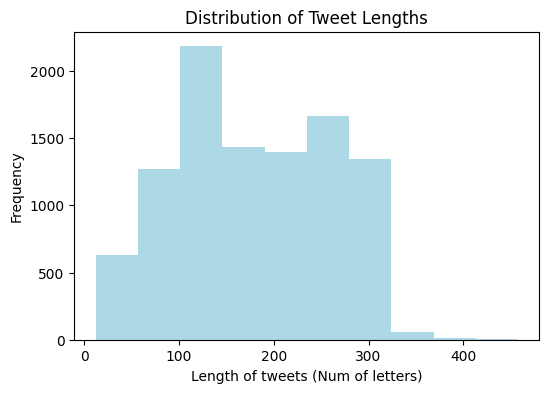

In [12]:
# Checking the len or distribution of tweets in the dataset
# Plot histogram of tweet lengths
plt.figure(figsize=(6, 4))
df2['len'].plot.hist(color="lightblue")
plt.ylabel('Frequency')
plt.xlabel('Length of tweets (Num of letters)')
plt.title('Distribution of Tweet Lengths')
plt.show()

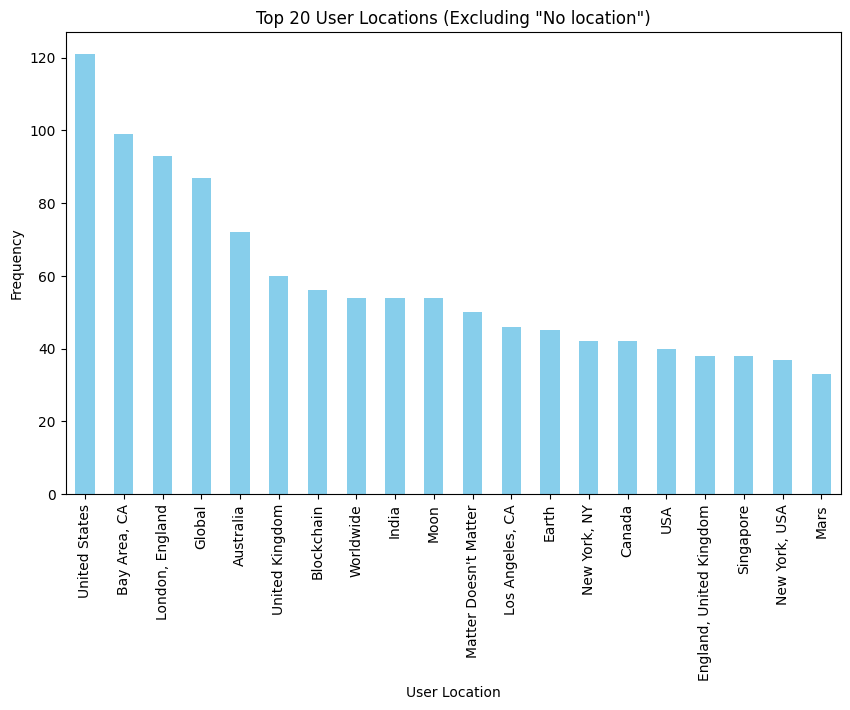

In [13]:
# Filter out 'No location' and rows with missing user_location
filtered_locations = df2[df2['user_location'] != 'No location']['user_location']

# Get the count of each unique location
location_counts = filtered_locations.value_counts()

# Plot histogram or bar chart for the distribution of locations
plt.figure(figsize=(10, 6))
location_counts.head(20).plot(kind='bar', color='skyblue')
plt.xlabel('User Location')
plt.ylabel('Frequency')
plt.title('Top 20 User Locations (Excluding "No location")')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()
plt.show()

## Data Pre-processing
We will perform the following:

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [14]:
# importing relavant libraries

import gensim
import re

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeojustin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Function to convert tweet text to words

def text_to_words(text):
    stemmer = PorterStemmer()

    # Lowercase the words
    text = text.lower() 
    
    # Removing URLs
    text = re.sub(r"http\S+|https\S+|www\S+", "", text)
    
    # Removing non-letters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenizing the text into words
    words_list = text.split()
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words_list = [w for w in words_list if w not in stop_words]
    
    # Apply stemming to get root words
    words_list = [stemmer.stem(w) for w in words_list]

    # Remove single-letter words and duplicates
    words_list = [w for w in words_list if len(w) > 1]
    
    return words_list

In [16]:
# Function to remove top 5 coin tickers

def remove_coin_tickers(word_list):
    coin_tickers = ['btc', 'bnb', 'xrp', 'ada', 'eth']
    word_list = [w for w in word_list if w.lower() not in coin_tickers]
    return word_list

In [17]:
cleaned_text = []

# Processing text and storing cleaned words in cleaned_text
for index, item in enumerate(df2['text']):
    words = text_to_words(item)  # Extract text from the tuple 'item'
    cleaned_text.append(words)

# Removing coin tickers from the processed words
for index, item in enumerate(cleaned_text):
    cleaned_text[index] = remove_coin_tickers(item)

df2['clean'] = cleaned_text

df2.head(10)

,user_location,text,hashtags,len,clean
0,No location,@desire_crypto @StarboundFin\nThe FIRST BSC De...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",289.0,"[desir, crypto, starboundfin, first, bsc, de, ..."
1,This is Anfield,Good project👊👊👊\n@kipoostrava\n\n@proiqbal\n#A...,"['Airdrop', 'Airdrops', 'BTC', 'HECO_Chain']",240.0,"[good, project, kipoostrava, proiqbal, airdrop..."
2,No location,Amazon Moves Into London Hair Care With Augmen...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",180.0,"[amazon, move, london, hair, care, augment, re..."
3,No location,"@airdropinspect good project, hopefully in the...","['Airdrop', 'Airdrops', 'Airdropinspector', 'B...",231.0,"[airdropinspect, good, project, hope, futur, e..."
4,No location,"📈💴$1,972,550 #bitcoin LONGED @$43729.5 [08/08/...",['bitcoin'],161.0,"[bitcoin, long, bybit, btcusd, peti, one, upsm..."
5,No location,#Binance Futures Liquidated on:\n🔵 #BTCUSDT $1...,"['Binance', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', ...",225.0,"[binanc, futur, liquid, btcusdt, dogeusdt, eth..."
6,"Campo Grande, Brésil🇧🇷",#RCF indicateur 911RS. #dow #trendfollowing #a...,"['RCF', 'dow', 'trendfollowing', 'algo', 'trad...",187.0,"[rcf, indicateur, rs, dow, trendfollow, algo, ..."
7,The World,If you want an investment buy #Bitcoin\n\nIf y...,['Bitcoin'],102.0,"[want, invest, buy, bitcoin, want, long, shot,..."
8,No location,@BTC_Archive #Bitcoin trying to fly over resis...,['Bitcoin'],78.0,"[archiv, bitcoin, tri, fli, resist]"
9,No location,"6/22/21 #Bitcoin video of the day ""06 - myNode...",['Bitcoin'],129.0,"[bitcoin, video, day, mynod, seri, network, wo..."


In [18]:
# Create a function to unlist a list data so that data can be used for further analysis

def unlisting(list):
    words = ''
    for item in list:
        words += item + ' '
        
    return words

### Analysing the Top most frequently used stemmed words

In [19]:
"""

# Define a function to clean and preprocess the hashtags
def clean_hashtags(hashtag_list):
    cleaned_tags = []
    
    # Iterate through each list of hashtags
    for tags in hashtag_list:
        clean_tags = [tag.lower().strip() for tag in tags]  # Convert to lowercase and remove extra spaces
        cleaned_tags.extend(clean_tags)  # Append cleaned hashtags to the list
        
    return cleaned_tags

# Apply the clean_hashtags function to the 'hashtags' column and store the cleaned hashtags in a new column 'clean_hashtags'
sampled_df['clean_hashtags'] = sampled_df['hashtags'].apply(clean_hashtags)

sampled_df.head(10)

"""

"\n\n# Define a function to clean and preprocess the hashtags\ndef clean_hashtags(hashtag_list):\n    cleaned_tags = []\n    \n    # Iterate through each list of hashtags\n    for tags in hashtag_list:\n        clean_tags = [tag.lower().strip() for tag in tags]  # Convert to lowercase and remove extra spaces\n        cleaned_tags.extend(clean_tags)  # Append cleaned hashtags to the list\n        \n    return cleaned_tags\n\n# Apply the clean_hashtags function to the 'hashtags' column and store the cleaned hashtags in a new column 'clean_hashtags'\nsampled_df['clean_hashtags'] = sampled_df['hashtags'].apply(clean_hashtags)\n\nsampled_df.head(10)\n\n"

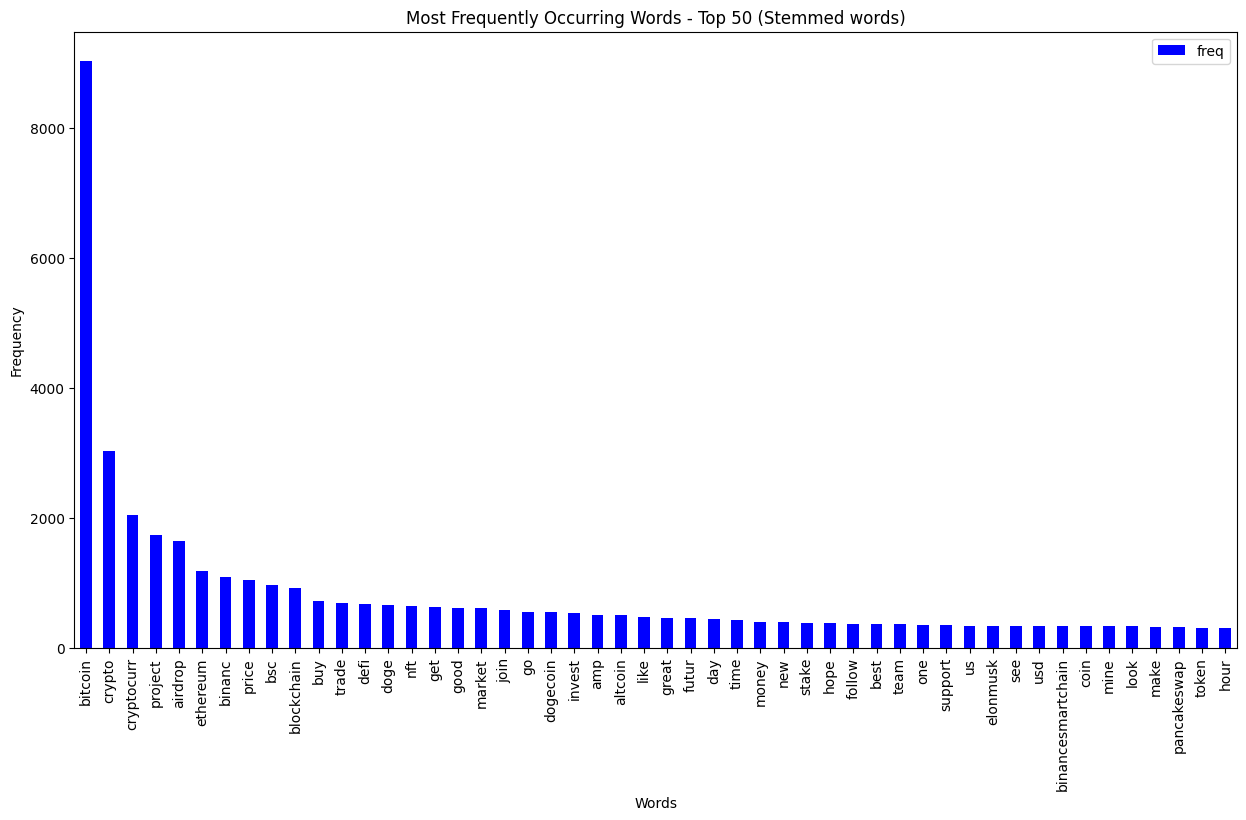

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

words_single_list = df2['clean'].sum()  # Merge all lists into a single list

# Count word occurrences in the merged list
word_counts = Counter(words_single_list)

# Get the top 100 most common words and their frequencies
top_words = word_counts.most_common(50)

# Create a DataFrame from the top words
frequency = pd.DataFrame(top_words, columns=['word', 'freq'])

# Plotting the top 100 most frequent words
frequency.plot(x='word', y='freq', kind='bar', figsize=(15, 8), color='blue')
plt.title("Most Frequently Occurring Words - Top 50 (Stemmed words)")
plt.xlabel('Words')
plt.ylabel('Frequency')
#plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
frequency.head(5)

,word,freq
0,bitcoin,9032
1,crypto,3033
2,cryptocurr,2049
3,project,1737
4,airdrop,1646


int64


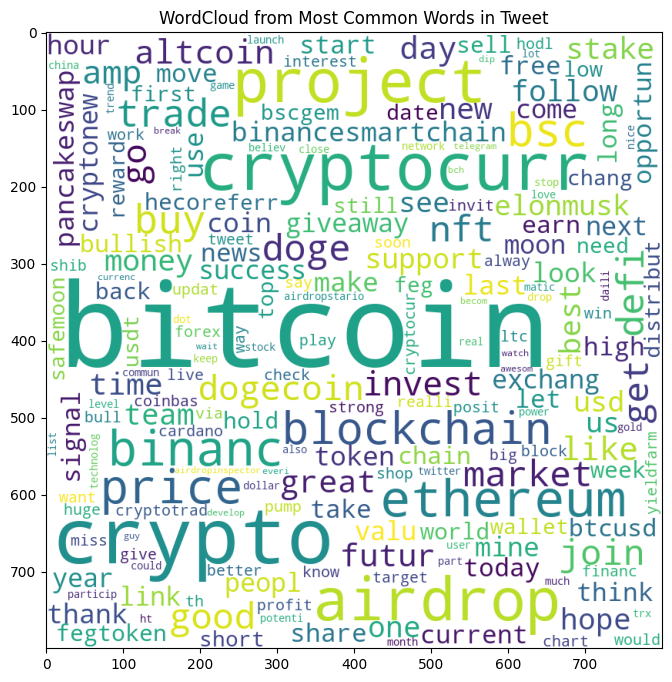

In [22]:
from wordcloud import WordCloud

# Get the top 200 most common words and their frequencies
top_words = word_counts.most_common(200)

# Create a DataFrame from the top words
frequency = pd.DataFrame(top_words, columns=['word', 'freq'])

# Convert 'freq' column to numeric type
frequency['freq'] = pd.to_numeric(frequency['freq'])

# Display the data type of 'freq' column
print(frequency['freq'].dtype)

# Generate WordCloud
wordcloud = WordCloud(background_color="white", width=800, height=800).generate_from_frequencies(dict(zip(frequency['word'], frequency['freq'].fillna(0))))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud from Most Common Words in Tweet")
plt.axis("on")
plt.show()

### Visualising the top hashtags used in the bitcoin dataset

In [23]:
# Clean hashtags column

cleaned_ht = []

# Processing text and storing cleaned words in cleaned_ht
for item in df2['hashtags']:
    ht = text_to_words(item)  # Extract ht from the tuple 'item'
    cleaned_ht.append(remove_coin_tickers(ht))

df2['clean_ht'] = cleaned_ht

df2.head(10)

,user_location,text,hashtags,len,clean,clean_ht
0,No location,@desire_crypto @StarboundFin\nThe FIRST BSC De...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",289.0,"[desir, crypto, starboundfin, first, bsc, de, ...","[launchpad, etf, stake, altcoin]"
1,This is Anfield,Good project👊👊👊\n@kipoostrava\n\n@proiqbal\n#A...,"['Airdrop', 'Airdrops', 'BTC', 'HECO_Chain']",240.0,"[good, project, kipoostrava, proiqbal, airdrop...","[airdrop, airdrop, heco, chain]"
2,No location,Amazon Moves Into London Hair Care With Augmen...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",180.0,"[amazon, move, london, hair, care, augment, re...","[bitcoin, cryptocurr, financ, forex, market, m..."
3,No location,"@airdropinspect good project, hopefully in the...","['Airdrop', 'Airdrops', 'Airdropinspector', 'B...",231.0,"[airdropinspect, good, project, hope, futur, e...","[airdrop, airdrop, airdropinspector, binancesm..."
4,No location,"📈💴$1,972,550 #bitcoin LONGED @$43729.5 [08/08/...",['bitcoin'],161.0,"[bitcoin, long, bybit, btcusd, peti, one, upsm...",[bitcoin]
5,No location,#Binance Futures Liquidated on:\n🔵 #BTCUSDT $1...,"['Binance', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', ...",225.0,"[binanc, futur, liquid, btcusdt, dogeusdt, eth...","[binanc, btcusdt, dogeusdt, ethusdt, ftx, cryp..."
6,"Campo Grande, Brésil🇧🇷",#RCF indicateur 911RS. #dow #trendfollowing #a...,"['RCF', 'dow', 'trendfollowing', 'algo', 'trad...",187.0,"[rcf, indicateur, rs, dow, trendfollow, algo, ...","[rcf, dow, trendfollow, algo, trade, ig, dax, ..."
7,The World,If you want an investment buy #Bitcoin\n\nIf y...,['Bitcoin'],102.0,"[want, invest, buy, bitcoin, want, long, shot,...",[bitcoin]
8,No location,@BTC_Archive #Bitcoin trying to fly over resis...,['Bitcoin'],78.0,"[archiv, bitcoin, tri, fli, resist]",[bitcoin]
9,No location,"6/22/21 #Bitcoin video of the day ""06 - myNode...",['Bitcoin'],129.0,"[bitcoin, video, day, mynod, seri, network, wo...",[bitcoin]


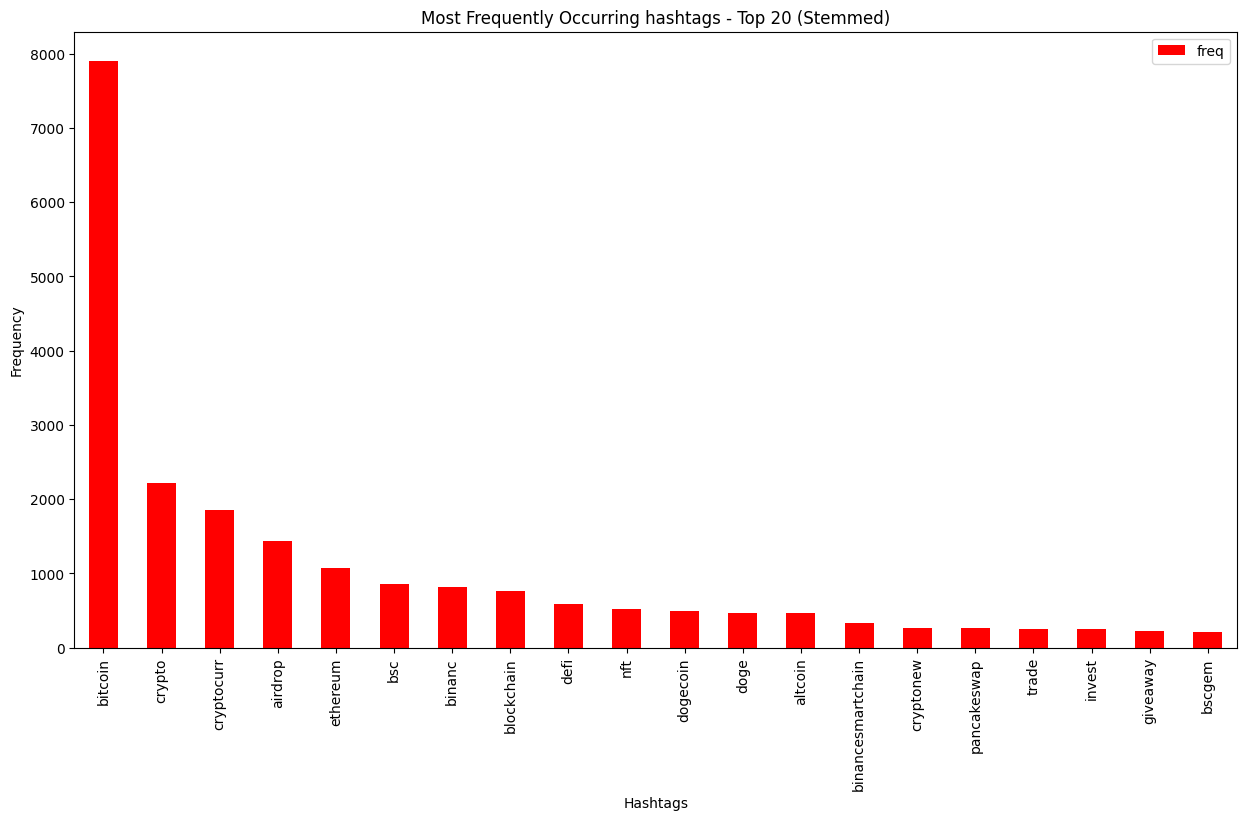

In [24]:
# Plotting the top 100 most frequent hashtags

ht_single_list = df2['clean_ht'].sum()  # Merge all lists into a single list

# Count word occurrences in the merged list
ht_counts = Counter(ht_single_list)

# Get the top 100 most common words and their frequencies
top_ht = ht_counts.most_common(20)

# Create a DataFrame from the top words
ht_frequency = pd.DataFrame(top_ht, columns=['hashtag', 'freq'])

# Plotting the top 100 most frequent words
ht_frequency.plot(x='hashtag', y='freq', kind='bar', figsize=(15, 8), color='red')
plt.title("Most Frequently Occurring hashtags - Top 20 (Stemmed)")
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
#plt.xticks(rotation=45, ha='right')
plt.show()

int64


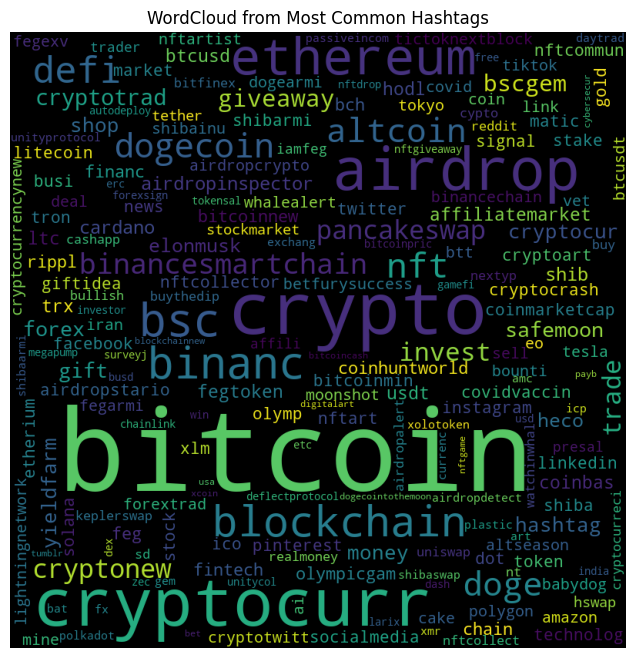

In [25]:
# Get the top 200 most common hashtags and their frequencies
top_ht = ht_counts.most_common(200)

# Create a DataFrame from the top words
ht_frequency = pd.DataFrame(top_ht, columns=['hashtag', 'freq'])

# Convert 'freq' column to numeric type
ht_frequency['freq'] = pd.to_numeric(ht_frequency['freq'])

# Display the data type of 'freq' column
print(ht_frequency['freq'].dtype)

# Generate WordCloud
wordcloud = WordCloud(background_color="black", width=800, height=800).generate_from_frequencies(dict(zip(ht_frequency['hashtag'], ht_frequency['freq'].fillna(0))))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud from Most Common Hashtags")
plt.axis("off")
plt.show()

### Sentiment Analysis

In [26]:
df2.head(3)

,user_location,text,hashtags,len,clean,clean_ht
0,No location,@desire_crypto @StarboundFin\nThe FIRST BSC De...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",289.0,"[desir, crypto, starboundfin, first, bsc, de, ...","[launchpad, etf, stake, altcoin]"
1,This is Anfield,Good project👊👊👊\n@kipoostrava\n\n@proiqbal\n#A...,"['Airdrop', 'Airdrops', 'BTC', 'HECO_Chain']",240.0,"[good, project, kipoostrava, proiqbal, airdrop...","[airdrop, airdrop, heco, chain]"
2,No location,Amazon Moves Into London Hair Care With Augmen...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",180.0,"[amazon, move, london, hair, care, augment, re...","[bitcoin, cryptocurr, financ, forex, market, m..."


### VADER (Valence Aware Dictionary and sEntiment Reasoner):

VADER is a rule-based sentiment analysis tool specifically designed for social media sentiments, which includes lexicons of sentiment-related words.
It measures the sentiment of a piece of text (e.g., social media posts, reviews, etc.) by evaluating the sentiment of individual words and their context, considering negations, capitalization, punctuation, and other linguistic rules.
VADER provides a score for each text based on its negative, neutral, positive, and compound sentiment. The compound score represents the overall sentiment ranging from -1 (extremely negative) to +1 (extremely positive).

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlisting(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlisting(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlisting(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlisting(x))["compound"])
    df['clean_non_list'] = df[label].apply(lambda x: unlisting(x))
    return df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yeojustin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
df_vader = compute_vader_scores(df2,'clean')
df_vader.head(5)

,user_location,text,hashtags,len,clean,clean_ht,vader_neg,vader_neu,vader_pos,vader_comp,clean_non_list
0,No location,@desire_crypto @StarboundFin\nThe FIRST BSC De...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",289.0,"[desir, crypto, starboundfin, first, bsc, de, ...","[launchpad, etf, stake, altcoin]",0.000,0.909,0.091,0.4019,desir crypto starboundfin first bsc de fi etf ...
1,This is Anfield,Good project👊👊👊\n@kipoostrava\n\n@proiqbal\n#A...,"['Airdrop', 'Airdrops', 'BTC', 'HECO_Chain']",240.0,"[good, project, kipoostrava, proiqbal, airdrop...","[airdrop, airdrop, heco, chain]",0.099,0.651,0.250,0.5267,good project kipoostrava proiqbal airdrop hswa...
2,No location,Amazon Moves Into London Hair Care With Augmen...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",180.0,"[amazon, move, london, hair, care, augment, re...","[bitcoin, cryptocurr, financ, forex, market, m...",0.000,0.726,0.274,0.5994,amazon move london hair care augment realiti t...
3,No location,"@airdropinspect good project, hopefully in the...","['Airdrop', 'Airdrops', 'Airdropinspector', 'B...",231.0,"[airdropinspect, good, project, hope, futur, e...","[airdrop, airdrop, airdropinspector, binancesm...",0.000,0.642,0.358,0.8591,airdropinspect good project hope futur even su...
4,No location,"📈💴$1,972,550 #bitcoin LONGED @$43729.5 [08/08/...",['bitcoin'],161.0,"[bitcoin, long, bybit, btcusd, peti, one, upsm...",[bitcoin],0.219,0.562,0.219,0.0000,bitcoin long bybit btcusd peti one upsmanship ...


<Figure size 400x400 with 0 Axes>

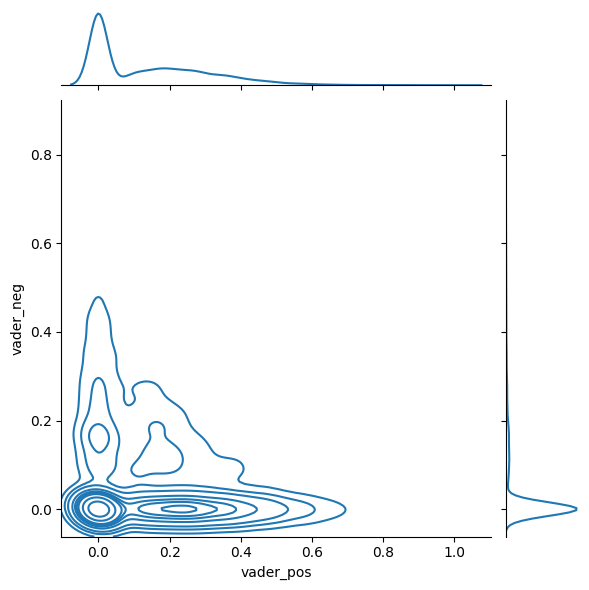

<Figure size 400x400 with 0 Axes>

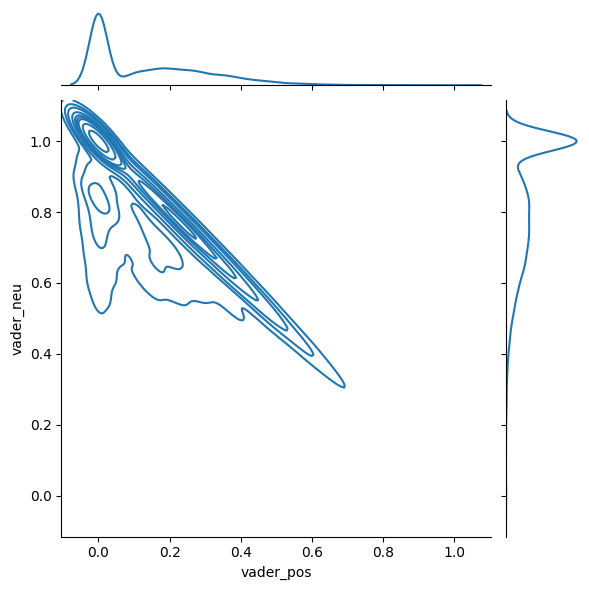

In [29]:
# Create the first jointplot with a smaller size
plt.figure(figsize=(4, 4))
sns.jointplot(data=df_vader, x='vader_pos', y='vader_neg', kind="kde")

# Create the second jointplot with a smaller size
plt.figure(figsize=(4, 4))
sns.jointplot(data=df2, x='vader_pos', y='vader_neu', kind="kde")

# Show the plots
plt.show()

These jointplots aim to provide insights into the relationships or correlations between different sentiment scores (positive vs. negative, and positive vs. neutral). They help in understanding how these sentiment scores relate to each other within the dataset, offering a visual representation of sentiment distributions and potential associations between various sentiment categories in the analyzed text data.


The e kernel density estimates (KDEs) of the joint distribution between vader_pos and vader_neg in the first plot, and vader_pos and vader_neu in the second plot. A KDE is a non-parametric method for estimating the probability density of a random variable. It is a useful tool for visualizing the relationship between two variables.

First plot:
- The first plot shows that there is a strong negative correlation between vader_pos and vader_neg. This is because the VADER sentiment analysis tool assigns higher scores to more positive text and lower scores to more negative text. As a result, text with high vader_pos scores is likely to have low vader_neg scores, and vice versa.
- The KDE also shows that there is a cluster of points in the lower left corner of the plot. This represents text with low vader_pos and vader_neg scores. This type of text is often neutral in sentiment.

Second plot:
- The second plot shows that there is a weaker negative correlation between vader_pos and vader_neu than there is between vader_pos and vader_neg. This is because the VADER sentiment analysis tool can assign positive scores to text that is neutral in sentiment, as long as the text does not contain any negative words.
- The KDE also shows that there is a larger cluster of points in the center of the plot than in the first plot. This is because there is more text that is neutral in sentiment than there is text that is strongly positive or negative.



### Word2Vec Model

During training, the Word2Vec model learns to predict the context of words within a given window size. It adjusts the word vectors (embeddings) in such a way that words appearing in similar contexts have vectors closer together in the vector space. This process captures semantic relationships between words, allowing for operations like finding similar words, word analogies, and more within the learned vector space.

After training, the model's embeddings can be used to find similarities between words, compute word analogies, or as input features for downstream natural language processing tasks such as text classification, sentiment analysis, and more.

In [30]:
import gensim

model_w2v = gensim.models.Word2Vec(
    df2['clean'],

    window=5,
    min_count=2,
    sg=1,
    negative=10,
    workers=2,
    seed=34
)

In [31]:
model_w2v.train(df2['clean'], total_examples = len(df2['clean']), epochs=20)

(2397724, 2994000)

In [32]:
model_w2v.wv.most_similar(positive="bitcoin")

[('crypto', 0.6873335838317871),
 ('cryptocurr', 0.5914919376373291),
 ('treasur', 0.5643112659454346),
 ('cryptoearn', 0.5540348887443542),
 ('bump', 0.5513597726821899),
 ('lksmi', 0.5502881407737732),
 ('tradezi', 0.5477697253227234),
 ('ethereum', 0.5461927056312561),
 ('sfil', 0.5422882437705994),
 ('hodlgang', 0.5378744006156921)]

In [33]:
model_w2v.wv.most_similar(positive="bullish")

[('tomo', 0.6026085019111633),
 ('mtc', 0.5755834579467773),
 ('bolt', 0.574445366859436),
 ('flm', 0.5719355344772339),
 ('bearish', 0.5712766647338867),
 ('wnxm', 0.5711023807525635),
 ('lpool', 0.5703138709068298),
 ('revers', 0.5686822533607483),
 ('rsi', 0.567363977432251),
 ('paxg', 0.5532050132751465)]

In [34]:
model_w2v.wv.most_similar(positive="bearish")

[('pennant', 0.7270849347114563),
 ('macd', 0.7007972002029419),
 ('reclaim', 0.6900081634521484),
 ('triangl', 0.6892691254615784),
 ('backtest', 0.6874986290931702),
 ('stoch', 0.6790078282356262),
 ('invalid', 0.6706454753875732),
 ('downtrend', 0.6689577102661133),
 ('diverg', 0.6661590337753296),
 ('div', 0.6644287705421448)]

In [65]:
model_w2v.wv.most_similar(positive="ethereum")

[('crypto', 0.6880073547363281),
 ('cryptocurr', 0.6267446279525757),
 ('binancecoin', 0.5918392539024353),
 ('gbit', 0.5810649394989014),
 ('wef', 0.5745127201080322),
 ('nux', 0.5679704546928406),
 ('cardanonewsfe', 0.5676466822624207),
 ('regga', 0.5676406621932983),
 ('shk', 0.5667721629142761),
 ('rakeback', 0.5636022686958313)]

<b>VADER was chosen due to its efficiency, tailored lexicon, and suitability for handling social media text, aligning perfectly with the need for rapid sentiment analysis of cryptocurrency-related tweets.</b>

1. Simplicity and Speed - VADER was preferred due to its rule-based approach and pre-built sentiment lexicon, requiring no extensive training or preprocessing, unlike Word2Vec, which demands substantial data and training time.
2. Specificity to Social Media Text - VADER is tailored for social media language nuances, including emoticons, slang, and abbreviated expressions common in platforms like Twitter, ensuring better sentiment analysis of informal text.
3. Out-of-the-Box Performance - VADER provides sentiment scores directly (positive, negative, neutral), ideal for a quick sentiment analysis without complex preprocessing or training.
4. Domain-specific Lexicon - VADER employs a lexicon updated for online conversations, including terms specific to cryptocurrencies, ensuring accurate sentiment analysis for this domain.
5. Task Alignment - For swift sentiment assessment of cryptocurrency tweets without necessitating deep semantic analysis, VADER emerged as an efficient choice.
6. No Training Overhead - VADER's plug-and-play nature eliminates the need for data training, making it a suitable solution for immediate sentiment analysis tasks.

### LDA

LDA, an unsupervised machine learning technique like K-means, automatically classifies words and documents into a fixed number of topics. These topics facilitate document organization and searching.

In [69]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# df['clean'] contains preprocessed text data
text_data = df2['clean']

# Create a dictionary and corpus required for Topic Modeling with LDA
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,  # Choose the number of topics
                     random_state=42,
                     passes=10)

In [70]:
# Print the topics generated by the LDA model
for topic_id, topic in lda_model.print_topics():
    print(f"Topic ID: {topic_id}\nWords: {topic}\n")

Topic ID: 0
Words: 0.071*"bitcoin" + 0.029*"crypto" + 0.024*"cryptocurr" + 0.013*"blockchain" + 0.011*"invest" + 0.009*"ethereum" + 0.008*"mine" + 0.007*"money" + 0.006*"get" + 0.006*"market"

Topic ID: 1
Words: 0.070*"bitcoin" + 0.009*"like" + 0.008*"see" + 0.007*"buy" + 0.007*"time" + 0.007*"amp" + 0.006*"go" + 0.006*"get" + 0.005*"crypto" + 0.005*"fegtoken"

Topic ID: 2
Words: 0.054*"project" + 0.041*"airdrop" + 0.034*"bitcoin" + 0.024*"bsc" + 0.019*"crypto" + 0.018*"cryptocurr" + 0.015*"good" + 0.012*"great" + 0.011*"team" + 0.011*"futur"

Topic ID: 3
Words: 0.024*"bitcoin" + 0.021*"stake" + 0.019*"airdrop" + 0.016*"nft" + 0.012*"chain" + 0.011*"join" + 0.011*"day" + 0.010*"referr" + 0.009*"heco" + 0.009*"shop"

Topic ID: 4
Words: 0.051*"bitcoin" + 0.026*"crypto" + 0.021*"binanc" + 0.021*"price" + 0.014*"doge" + 0.014*"cryptocurr" + 0.012*"ethereum" + 0.009*"dogecoin" + 0.009*"altcoin" + 0.008*"trade"



In [71]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

Coherence Score: 0.46861941143944935


In [74]:
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

Perplexity: -7.691449022372216


In [75]:
coherence_model_umass = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

### Preparing to train the model

Class 0: Negative Sentiment
- Assigned when the sentiment score indicating negativity (vader_neg) is greater than 0. This suggests the presence of negative sentiment in the text.
- Examples might include tweets or texts expressing dissatisfaction, criticism, or pessimism.

Class 1: Neutral Sentiment
- Assigned when neither the negative nor the positive sentiment scores are above 0.
- Indicates that the sentiment analysis did not detect strong negative or positive sentiments in the text.
- Often represents texts with a lack of strong emotional tone, stating facts, or being ambiguous.

Class 2: Positive Sentiment
- Assigned when the sentiment score indicating positivity (vader_pos) is greater than 0.
- Implies the presence of positive sentiment in the text, such as expressions of happiness, satisfaction, or positivity.
- These classes serve as a basic categorization of sentiments within the texts based on the VADER sentiment analysis tool. They aim to categorize the sentiment polarity as either negative, neutral, or positive, assisting in understanding the general emotional tone conveyed by the text data.

In [64]:
"""
Create a new column 'class' in the DataFrame df2, populated with the class labels (0, 1, or 2) 
determined by the conditions based on the 'vader_neg' and 'vader_pos' columns for each row. 
"""

def assign_class(row):
    if row['vader_neg'] > 0:
        return 0
    elif row['vader_pos'] > 0:
        return 2
    else:
        return 1

In [37]:
# Apply the function to create the 'class' column
df2['class'] = df2.apply(lambda row: assign_class(row), axis=1)

# Check on our dataset if 'Class' column is created
df2.columns

Index(['user_location', 'text', 'hashtags', 'len', 'clean', 'clean_ht',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_comp', 'clean_non_list',
       'class'],
      dtype='object')

In [38]:
df2['class'].value_counts()

class
2    4191
1    3707
0    2102
Name: count, dtype: int64

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df2['clean_non_list'][0])
X, tokenizer = tokenize_pad_sequences(df2['clean_non_list'])
print('After Tokenization & Padding \n', X[0])

print(X.shape)

2023-12-01 23:15:25.402081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before Tokenization & Padding 
 desir crypto starboundfin first bsc de fi etf exchang live launch transfer fund back forth smart chain exchang invest favorit crypto altcoin go tg launchpad etf stake altcoin 
After Tokenization & Padding 
 [1838    2 4940  101    9  927 2136  636   56  146  187  304  261   85
 3284  436   82   56   22 1232    2   24   20  493 2301  636   32   24
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
(10000, 50)


In [40]:
from sklearn.model_selection import train_test_split

#train test split dataset

y = pd.get_dummies(df2['class'])

#train test split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# check df shape
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)
print('Validation Set: ', X_val.shape, y_val.shape)

Train Set:  (6000, 50) (6000, 3)
Test Set:  (2000, 50) (2000, 3)
Validation Set:  (2000, 50) (2000, 3)


In [41]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [43]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

## Building the model

In [44]:
# Define the optimizer
optimizer_config = {
    'learning_rate': learning_rate,
    'momentum': momentum,
    'nesterov': False
}
sgd_optimizer = SGD(**optimizer_config)

# Initialize the sequential model
model = Sequential()

# Add layers to the model
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy', Precision(), Recall()])

In [47]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
94/94 [==============================] - 4s 19ms/step - loss: 1.0497 - accuracy: 0.4462 - precision: 0.5831 - recall: 0.0597 - val_loss: 1.0200 - val_accuracy: 0.4965 - val_precision: 0.6048 - val_recall: 0.2540
Epoch 2/10
94/94 [==============================] - 1s 11ms/step - loss: 0.9796 - accuracy: 0.5402 - precision: 0.6036 - recall: 0.3437 - val_loss: 0.9551 - val_accuracy: 0.5310 - val_precision: 0.5940 - val_recall: 0.3965
Epoch 3/10
94/94 [==============================] - 1s 10ms/step - loss: 0.8634 - accuracy: 0.6062 - precision: 0.7074 - recall: 0.4593 - val_loss: 0.7346 - val_accuracy: 0.6745 - val_precision: 0.7527 - val_recall: 0.5950
Epoch 4/10
94/94 [==============================] - 1s 10ms/step - loss: 0.6470 - accuracy: 0.7270 - precision: 0.7783 - recall: 0.6552 - val_loss: 0.6042 - val_accuracy: 0.7280 - val_precision: 0.7676 - val_recall: 0.6935
Epoch 5/10
94/94 [==============================] - 1s 11ms/step - loss: 0.4977 - accuracy: 0.7863 - precisi

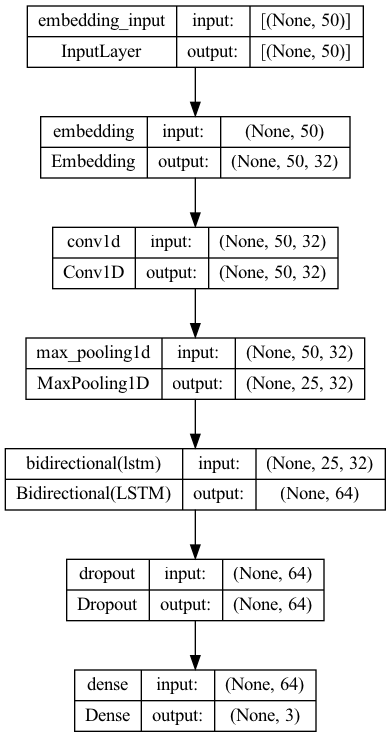

In [57]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

#### Components of the Model:
Sequential Model Initialization:

The Sequential() function initializes a linear stack of layers, enabling the creation of a neural network in a sequential manner. Layers are added one by one, in sequence.
Embedding Layer:

The Embedding layer is the initial layer of the neural network. It is commonly used in natural language processing (NLP) tasks to convert input text data into fixed-size dense vectors (word embeddings).
vocab_size: Specifies the size of the vocabulary, i.e., the total number of unique words in the corpus.
embedding_size: Represents the dimensionality of the embedding space. It determines the length of the dense embedding for each word.
input_length: Indicates the length of each input sequence.
Convolutional 1D Layer:

The Conv1D layer performs 1D convolution on the input sequences.
filters: Specifies the number of filters (output channels).
kernel_size: Determines the size of the convolutional window.
padding='same': Ensures that the output has the same length as the input by padding if necessary.
activation='relu': Applies the Rectified Linear Unit activation function.
MaxPooling 1D Layer:

The MaxPooling1D layer performs downsampling by taking the maximum value from a pool of values.
pool_size: Specifies the size of the pooling window.
Bidirectional LSTM Layer:

The Bidirectional layer wraps an LSTM (Long Short-Term Memory) layer to make it bidirectional.
LSTM(32): Defines an LSTM layer with 32 units (or neurons). LSTM is a type of recurrent neural network (RNN) capable of learning long-term dependencies.
Dropout Layer:

The Dropout layer helps prevent overfitting by randomly setting a fraction of input units to zero during training (in this case, 40%).
Dense Layer (Output Layer):

The Dense layer represents the output layer of the neural network.
3: Indicates the number of output units, corresponding to the number of classes in the classification task.
activation='softmax': Applies the softmax activation function, which converts model outputs into probability distributions over the classes, ensuring they sum up to 1.

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            1056      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

## Evaluation

In [48]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9165
Precision : 0.9182
Recall    : 0.9150
F1 Score  : 0.9166


The evaluation of the model yielded promising results across various metrics on the test dataset. The model achieved an accuracy of 91.65%, with precision and recall scores of 91.82% and 91.50%, respectively. Additionally, the F1 score, which balances precision and recall, stands at 91.66%.

This performance showcases the effectiveness of the model in accurately classifying the target classes based on the provided features. The high scores across multiple evaluation metrics affirm the model's capability to generalize well on unseen data, indicating its potential for practical application in the given context

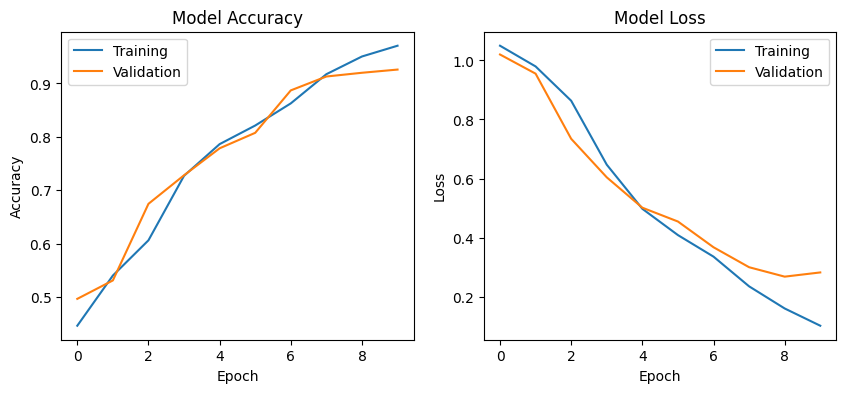

In [58]:
def plot_training_metrics(history):
    '''Visualizes the training and validation metrics across epochs'''

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot accuracy metrics
    ax[0].plot(history.history['accuracy'], label='Training')
    ax[0].plot(history.history['val_accuracy'], label='Validation')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    
    # Plot loss metrics
    ax[1].plot(history.history['loss'], label='Training')
    ax[1].plot(history.history['val_loss'], label='Validation')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')

# Display training history plots
plot_training_metrics(history)

- The model achieves high accuracy on both the training and validation sets, indicating that it is able to generalize well to unseen data.
- The model's loss decreases over time, which suggests that it is learning to make better predictions.
- The model's accuracy on the validation set is slightly lower than its accuracy on the training set, which suggests that there may be some overfitting. However, the difference in accuracy is relatively small, so the overfitting is likely not severe.

63/63 [==============================] - 1s 2ms/step
2    834
1    754
0    412
Name: count, dtype: int64
2    918
1    764
0    318
Name: count, dtype: int64


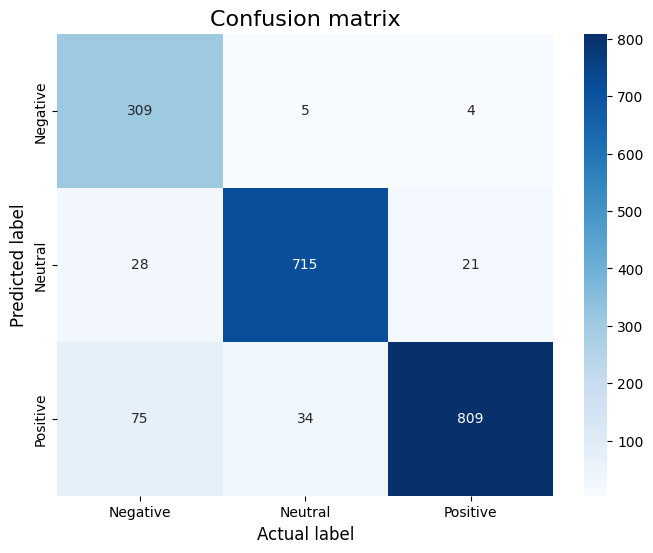

In [50]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [63]:
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
print(cm)

63/63 [==============================] - 0s 2ms/step
[[309   5   4]
 [ 28 715  21]
 [ 75  34 809]]


The confusion matrix is a table used to assess the model's classification accuracy by tabulating true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

True Positives (TP): The diagonal elements represent the number of samples correctly predicted for each class. For example:

    Class 0: 309 samples correctly predicted as class 0.
    Class 1: 715 samples correctly predicted as class 1.
    Class 2: 809 samples correctly predicted as class 2.

False Positives (FP): Values in columns where the true class is different from the predicted class. For instance:

    5 samples were predicted as class 1 but were actually class 0.
    34 samples were predicted as class 2 but were actually class 1.
    75 samples were predicted as class 0 but were actually class 2.

False Negatives (FN): Values in rows where the true class is different from the predicted class. For example:

    28 samples were predicted as class 0 but were actually class 1.
    21 samples were predicted as class 1 but were actually class 2.
    4 samples were predicted as class 2 but were actually class 0.

In summary, the confusion matrix provides a detailed breakdown of the model's performance across different classes. It is a valuable tool to assess the model's strengths and weaknesses in classification tasks, especially in scenarios involving multiple classes.